The MIT License (MIT)

Copyright (c) 2021 NVIDIA CORPORATION

Permission is hereby granted, free of charge, to any person obtaining a copy of
this software and associated documentation files (the "Software"), to deal in
the Software without restriction, including without limitation the rights to
use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
the Software, and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [1]:
!python --version

Python 3.7.10


In [2]:
# Check CUDA/cuDNN Version
!nvcc -V && which nvcc

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
/usr/local/cuda/bin/nvcc


In [3]:
# ubunta version
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


In [4]:
# Check GPU
!nvidia-smi

Tue Apr 13 02:25:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import pynvml

pynvml.nvmlInit()
handle = pynvml.nvmlDeviceGetHandleByIndex(0)
device_name = pynvml.nvmlDeviceGetName(handle)
print(device_name)
if device_name != b'Tesla T4' and device_name != b'Tesla P100-PCIE-16GB':
  raise Exception("""
    Unfortunately this instance does not have a T4 GPU.
    
    Please make sure you've configured Colab to request a GPU instance type.
    
    Sometimes Colab allocates a Tesla K80 instead of a T4. Resetting the instance.

    If you get a K80 GPU, try Runtime -> Reset all runtimes...
  """)
else:
  print('Woo! You got the right kind of GPU!')

b'Tesla P100-PCIE-16GB'
Woo! You got the right kind of GPU!


In [6]:
# Install RAPIDS
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.18

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 213 (delta 22), reused 3 (delta 0), pack-reused 171
Receiving objects: 100% (213/213), 64.29 KiB | 12.86 MiB/s, done.
Resolving deltas: 100% (84/84), done.
PLEASE READ
********************************************************************************************************
Changes:
1. IMPORTANT SCRIPT CHANGES: Colab has updated to Python 3.7, and now runs our STABLE and NIGHTLY versions (0.18 and 0.19)!  PLEASE update your older install script code as follows:
	!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.18

	import sys, os

	dist_package_index = sys.path.index('/usr/local/lib/python3.7/dist-packages')
	sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.7/site-packages'] + sys.path[dist_package_index:]
	sys.path
	exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals

In [7]:
# delete package cache
!conda clean -a -y

Cache location: /usr/local/pkgs
Will remove the following tarballs:

/usr/local/pkgs
---------------
multidict-5.1.0-py37h5e8e339_1.tar.bz2        67 KB
ld_impl_linux-64-2.33.1-h53a641e_7.conda     568 KB
libedit-3.1.20191231-h14c3975_1.conda        116 KB
libcumlprims-0.18.0-cuda11.0_g5939d3e_0.tar.bz2     1.1 MB
cryptography-3.4.7-py37h5d9358c_0.tar.bz2     1.1 MB
terminado-0.9.4-py37h89c1867_0.tar.bz2        26 KB
arrow-cpp-proc-3.0.0-cuda.tar.bz2             24 KB
dask-2021.4.0-pyhd8ed1ab_0.tar.bz2             4 KB
typing-extensions-3.7.4.3-0.tar.bz2            8 KB
cyrus-sasl-2.1.27-h063b49f_1.tar.bz2         228 KB
websockets-8.1-py37h5e8e339_3.tar.bz2         90 KB
pyee-7.0.4-pyh9f0ad1d_0.tar.bz2               14 KB
sqlite-3.33.0-h62c20be_0.conda               1.1 MB
protobuf-3.13.0.1-py37h745909e_1.tar.bz2     704 KB
brotlipy-0.7.0-py37h5e8e339_1001.tar.bz2     341 KB
re2-2020.11.01-h58526e2_0.tar.bz2            226 KB
traitlets-5.0.5-py_0.tar.bz2                  81 KB
xorg-li

In [8]:
import sys, os

dist_package_index = sys.path.index('/usr/local/lib/python3.7/dist-packages')
sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.7/site-packages'] + sys.path[dist_package_index:]
sys.path
exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

***********************************************************************
Let us check on those pyarrow and cffi versions...
***********************************************************************

You're don't have pyarrow.
unloaded cffi 1.14.5
loaded cffi 1.14.5


In [9]:
import argparse
import os
import sys
from pathlib import Path

os.environ['CUDA_VISIBLE_DEVICES'] = "0"

fname = 'cpmp_092'

checkpoint_path = Path('./checkpoints') / fname

# if not checkpoint_path.exists():
#     checkpoint_path.mkdir(parents=True)
# else:
#     sys.exit()
    
# input_path = Path('../../00_Data/')
input_path = Path('./')

In [10]:
!wget https://raw.githubusercontent.com/louislung/deeplearning/main/WSDM2021/00_Data/test_set.csv
!wget https://raw.githubusercontent.com/louislung/deeplearning/main/WSDM2021/00_Data/train_set.csv
!wget https://raw.githubusercontent.com/louislung/deeplearning/main/WSDM2021/01_Preprocess/train_and_test_2.tar

--2021-04-13 02:40:52--  https://raw.githubusercontent.com/louislung/deeplearning/main/WSDM2021/00_Data/test_set.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29150292 (28M) [text/plain]
Saving to: ‘test_set.csv’

test_set.csv        100%[===================>]  27.80M  55.6MB/s    in 0.5s    

2021-04-13 02:40:54 (55.6 MB/s) - ‘test_set.csv’ saved [29150292/29150292]

--2021-04-13 02:40:54--  https://raw.githubusercontent.com/louislung/deeplearning/main/WSDM2021/00_Data/train_set.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

In [11]:
!tar -xvzf train_and_test_2.tar
!rm train_and_test_2.tar

train_and_test_2.csv


In [12]:
LOW_CITY_THR = 9

In [13]:
import logging
import os
import random
import time
import warnings
import pickle as pkl
import numpy as np
import pandas as pd
import cudf
import cupy
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torch.cuda.amp import autocast, GradScaler
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.sparse import coo_matrix
from sklearn.decomposition import TruncatedSVD
from tqdm import tqdm
import gc

In [14]:
# create new col in input df
# set nan if no value after shift
def shift_feature(df, groupby_col, col, offset, nan=-1, colname=''):
    df[colname] = df[col].shift(offset)
    df.loc[df[groupby_col]!=df[groupby_col].shift(offset), colname] = nan

In [15]:
pd.options.display.max_columns = 100

In [16]:
def seed_torch(seed_value):
    random.seed(seed_value) # Python
    np.random.seed(seed_value) # cpu vars
    torch.manual_seed(seed_value) # cpu  vars    
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # gpu vars
    if torch.backends.cudnn.is_available:
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

In [17]:
# Return top4 metric
# istest: flag to select if metric should be computed in 0:train, 1:test,
# pos: select which city to calculate the metric, 0: last, 1: last-1, 2:last-2 , -1: all
# the input `val` dataframe must contains the target `city_id` and the 4 recommendations as: rec0, rec1, rec2 and rec3

def top4_metric( val, istest=0, pos=0 , target='city_id'):
    
    if istest>=0:
        val = val.loc[ (val.submission==0) & (val.istest == istest) ]
    else:
        val = val.loc[ (val.submission==0) ]

    if pos >= 0:
        top1 = val.loc[val.icount==pos,target] == val.loc[val.icount==pos,'rec0']
        top2 = val.loc[val.icount==pos,target] == val.loc[val.icount==pos,'rec1']
        top3 = val.loc[val.icount==pos,target] == val.loc[val.icount==pos,'rec2']
        top4 = val.loc[val.icount==pos,target] == val.loc[val.icount==pos,'rec3']
    else:
        top1 = val[target] == val['rec0']
        top2 = val[target] == val['rec1']
        top3 = val[target] == val['rec2']
        top4 = val[target] == val['rec3']
        
    return (top1|top2|top3|top4).mean()    

In [18]:
raw = cudf.read_csv(input_path / 'train_and_test_2.csv')
print(raw.shape)

(1545502, 16)


In [19]:
# these are records for submission
raw.loc[raw['city_id'] == 0, 'city_id'] = np.NaN

In [20]:
LOW_CITY_THR

9

In [21]:
# for city that has total count <= LOW_CITY_THR, set city_id=-1
# only count in train set and not the final stop of a trip
df = raw[(raw.istest == 0) | (raw.icount > 0)].groupby('city_id').utrip_id.count().reset_index()
df

df.columns = ['city_id', 'city_count']
raw = raw.merge(df, how='left', on='city_id')
raw.loc[raw.city_count <= LOW_CITY_THR, 'city_id'] = -1
raw = raw.sort_values(['utrip_id', 'checkin'])

In [22]:
# factorize these columns
CATS = ['city_id', 'hotel_country', 'booker_country', 'device_class']
MAPS = []
for c in CATS:
    raw[c+'_'], mp = raw[c].factorize()
    MAPS.append(mp)
    print('created', c+'_')   


created city_id_
created hotel_country_
created booker_country_
created device_class_


In [23]:
# get factorized id where city_id = -1
LOW_CITY = np.where(MAPS[0].to_pandas() == -1)[0][0]
LOW_CITY

0

In [24]:
NUM_CITIES = raw.city_id_.max()+1
print(NUM_CITIES)
NUM_HOTELS = raw.hotel_country_.max()+1
print(NUM_HOTELS)
NUM_DEVICE = raw.device_class_.max() + 1
print(NUM_DEVICE)

11159
195
3


In [25]:
# Data Augmentation, reverse a trip (only for train set)
raw['reverse'] = 0
rev_raw = raw[raw.istest == 0].copy()
rev_raw['reverse'] = 1
rev_raw['utrip_id'] = rev_raw['utrip_id']+'_r'

In [26]:
# combine reverse trip data into raw
# note icount and dcount are correct for reversed data
# but checkin date are not handled yet
tmp = rev_raw['icount'].values.copy()
rev_raw['icount'] = rev_raw['dcount']
rev_raw['dcount'] = tmp
rev_raw = rev_raw.sort_values(['utrip_id', 'dcount']).reset_index(drop=True)
raw = cudf.concat([raw, rev_raw]).reset_index(drop=True)

In [27]:
raw['sorting'] = cupy.asarray(range(raw.shape[0]))

In [28]:
# factorize utrip_id again 
# because of the new reverse trip_id
raw['utrip_id'+'_'], mp = raw['utrip_id'].factorize()

In [29]:
# ENGINEER LAG FEATURES
# for each utrip, get the last 1,2,3,4,5 city_id & hotel_country as features
# set NUM_CITIES if no value after shift
LAGS=5
lag_cities = []
lag_countries = []

for i in range(1,LAGS+1):
    shift_feature(raw, 'utrip_id_', 'city_id_', i, NUM_CITIES, f'city_id_lag{i}')
    lag_cities.append(f'city_id_lag{i}')
    shift_feature(raw, 'utrip_id_', 'hotel_country_', i, NUM_HOTELS, f'country_lag{i}')
    lag_countries.append(f'country_lag{i}')

In [30]:
lag_cities

['city_id_lag1',
 'city_id_lag2',
 'city_id_lag3',
 'city_id_lag4',
 'city_id_lag5']

In [31]:
#lag_countries = lag_countries[:1]
lag_countries

['country_lag1',
 'country_lag2',
 'country_lag3',
 'country_lag4',
 'country_lag5']

In [32]:
# add first city and first hotel_country as features
tmpD = raw[raw['dcount']==0][['utrip_id', 'city_id_']]
tmpD.columns = ['utrip_id', 'first_city']
raw = raw.merge(tmpD,on='utrip_id',how='left')

tmpD = raw[raw['dcount']==0][['utrip_id', 'hotel_country_']]
tmpD.columns = ['utrip_id', 'first_country']
raw = raw.merge(tmpD,on='utrip_id',how='left')

In [33]:
%%time

raw['checkin'] = cudf.to_datetime(raw.checkin, format="%Y-%m-%d")
raw['checkout'] = cudf.to_datetime(raw.checkout, format="%Y-%m-%d")

CPU times: user 8.14 ms, sys: 3.91 ms, total: 12.1 ms
Wall time: 14.8 ms


In [34]:
# add checkin month, checkin&out weekday, log(1 + stay length in days) as features
raw['mn'] = raw.checkin.dt.month
raw['dy1'] = raw.checkin.dt.weekday
raw['dy2'] = raw.checkout.dt.weekday
raw['length'] = cupy.log1p((raw.checkout - raw.checkin).dt.days) 

In [35]:
# add first checkin and last checkout of the trip
tmpD = raw[raw['dcount']==0][['utrip_id', 'checkin']]
tmpD.columns = ['utrip_id', 'first_checkin']
raw = raw.merge(tmpD,on='utrip_id',how='left')

tmpD = raw[raw['icount']==0][['utrip_id', 'checkout']]
tmpD.columns = ['utrip_id', 'last_checkout']
raw = raw.merge(tmpD,on='utrip_id',how='left')

In [36]:
# add log(1 + abs(trip length in days)) * sign of trip length
# for same day trip, trip_length = 0
# ??? for reverse trip due to data augmentation, trip length < 0 ???
raw['trip_length'] = ((raw.last_checkout - raw.first_checkin).dt.days)
raw['trip_length'] = cupy.log1p(cupy.abs(raw['trip_length'])) * cupy.sign(raw['trip_length'])

In [37]:
# add last checkin and first checkout
tmpD = raw[raw['icount']==0][['utrip_id', 'checkin']]
tmpD.columns = ['utrip_id', 'last_checkin']
raw = raw.merge(tmpD,on='utrip_id',how='left')

tmpD = raw[raw['dcount']==0][['utrip_id', 'checkout']]
tmpD.columns = ['utrip_id', 'first_checkout']
raw = raw.merge(tmpD,on='utrip_id',how='left')

# normalize the trip_length by subtract with mean
raw['trip_length'] = raw['trip_length'] - raw['trip_length'].mean()

In [38]:
raw = raw.sort_values('sorting')

In [39]:
# add last checkout date (what out reversed trip?)
shift_feature(raw, 'utrip_id_', 'checkout', 1, None, f'checkout_lag{1}')

In [40]:
# lapse = days between checkin and last checkout
# for first record of each trip, lapse = -1
raw['lapse'] = (raw['checkin'] - raw['checkout_lag1'] ).dt.days.fillna(-1)

In [41]:
# ENGINEER WEEKEND AND SEASON
# day_name is same as dy1 above ???
raw['day_name']= raw.checkin.dt.weekday
raw['weekend']=raw['day_name'].isin([5,6]).astype('int8')
df_season = cudf.DataFrame({'mn': range(1,13), 'season': ([0]*3)+([1]*3)+([2]*3)+([3]*3)})
raw=raw.merge(df_season, how='left', on='mn')
raw = raw.sort_values(['sorting'], ascending=True)


In [42]:
raw.head(10)

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,istest,fold,submission,N,utrip_id_,dcount,icount,city_count,city_id_,hotel_country_,booker_country_,device_class_,reverse,sorting,city_id_lag1,country_lag1,city_id_lag2,country_lag2,city_id_lag3,country_lag3,city_id_lag4,country_lag4,city_id_lag5,country_lag5,first_city,first_country,mn,dy1,dy2,length,first_checkin,last_checkout,trip_length,last_checkin,first_checkout,checkout_lag1,lapse,day_name,weekend,season
736,1000027,2016-08-13,2016-08-14,8183.0,desktop,7168,Elbonia,Gondal,1000027_1,0,0,0,4,0,0,3,12,1318,60,1,0,0,0,11159,195,11159,195,11159,195,11159,195,11159,195,1318,60,8,5,6,0.693147,2016-08-13,2016-08-21,1.690487,2016-08-18,2016-08-14,<NA>,-1,5,1,2
740,1000027,2016-08-14,2016-08-16,15626.0,desktop,7168,Elbonia,Gondal,1000027_1,0,0,0,4,0,1,2,1434,2545,60,1,0,0,1,1318,60,11159,195,11159,195,11159,195,11159,195,1318,60,8,6,1,1.098612,2016-08-13,2016-08-21,1.690487,2016-08-18,2016-08-14,2016-08-14 00:00:00.000000000,0,6,1,2
744,1000027,2016-08-16,2016-08-18,60902.0,desktop,7168,Elbonia,Gondal,1000027_1,0,0,0,4,0,2,1,75,10070,60,1,0,0,2,2545,60,1318,60,11159,195,11159,195,11159,195,1318,60,8,1,3,1.098612,2016-08-13,2016-08-21,1.690487,2016-08-18,2016-08-14,2016-08-16 00:00:00.000000000,0,1,0,2
748,1000027,2016-08-18,2016-08-21,30628.0,desktop,253,Elbonia,Gondal,1000027_1,0,0,0,4,0,3,0,94,5036,60,1,0,0,3,10070,60,2545,60,1318,60,11159,195,11159,195,1318,60,8,3,6,1.386294,2016-08-13,2016-08-21,1.690487,2016-08-18,2016-08-14,2016-08-18 00:00:00.000000000,0,3,0,2
752,1000033,2016-04-09,2016-04-11,38677.0,mobile,359,Gondal,Cobra Island,1000033_1,0,0,0,5,2,0,4,2740,6383,36,2,1,0,4,11159,195,11159,195,11159,195,11159,195,11159,195,6383,36,4,5,0,1.098612,2016-04-09,2016-04-19,1.891158,2016-04-16,2016-04-11,<NA>,-1,5,1,1
756,1000033,2016-04-11,2016-04-12,52089.0,desktop,384,Gondal,Cobra Island,1000033_1,0,0,0,5,2,1,3,195,8616,36,2,0,0,5,6383,36,11159,195,11159,195,11159,195,11159,195,6383,36,4,0,1,0.693147,2016-04-09,2016-04-19,1.891158,2016-04-16,2016-04-11,2016-04-11 00:00:00.000000000,0,0,0,1
760,1000033,2016-04-12,2016-04-14,21328.0,desktop,384,Gondal,Cobra Island,1000033_1,0,0,0,5,2,2,2,2047,3520,36,2,0,0,6,8616,36,6383,36,11159,195,11159,195,11159,195,6383,36,4,1,3,1.098612,2016-04-09,2016-04-19,1.891158,2016-04-16,2016-04-11,2016-04-12 00:00:00.000000000,0,1,0,1
764,1000033,2016-04-14,2016-04-16,27485.0,desktop,384,Gondal,Cobra Island,1000033_1,0,0,0,5,2,3,1,421,4519,36,2,0,0,7,3520,36,8616,36,6383,36,11159,195,11159,195,6383,36,4,3,5,1.098612,2016-04-09,2016-04-19,1.891158,2016-04-16,2016-04-11,2016-04-14 00:00:00.000000000,0,3,0,1
738,1000033,2016-04-16,2016-04-19,38677.0,desktop,384,Gondal,Cobra Island,1000033_1,0,0,0,5,2,4,0,2740,6383,36,2,0,0,8,4519,36,3520,36,8616,36,6383,36,11159,195,6383,36,4,5,1,1.386294,2016-04-09,2016-04-19,1.891158,2016-04-16,2016-04-11,2016-04-16 00:00:00.000000000,0,5,1,1
742,1000045,2016-06-18,2016-06-20,64876.0,desktop,2790,The Devilfire Empire,Fook Island,1000045_1,0,0,0,7,4,0,6,9634,10730,52,4,0,0,9,11159,195,11159,195,11159,195,11159,195,11159,195,10730,52,6,5,0,1.098612,2016-06-18,2016-06-29,1.978169,2016-06-28,2016-06-20,<NA>,-1,5,1,1


(-1.3960403887864967, 1.9599287461101231)

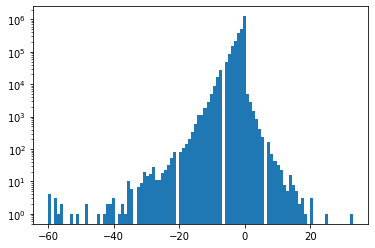

In [43]:
# lapse = days between checkin and last checkout
_ = plt.hist(raw['lapse'].to_pandas(), bins=100, log=True)
raw['lapse'].mean(), raw['lapse'].std()

(6.112431088024829, 2.7825277630929546)

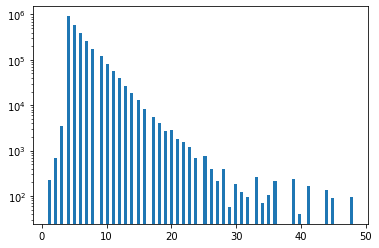

In [44]:
# N = number of records/cities per trip
_ = plt.hist(raw['N'].to_pandas(), bins=100, log=True)
raw['N'].mean(), raw['N'].std()

In [45]:
# normalize N, why? because mean is too high?
raw['N'] = raw['N'] - raw['N'].mean()
raw['N'] /= 3

(-1.4167174340764521e-16, 0.9275092543643186)

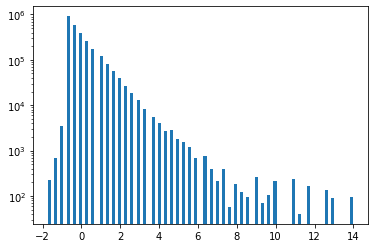

In [46]:
# N = number of records/cities per trip
_ = plt.hist(raw['N'].to_pandas(), bins=100, log=True)
raw['N'].mean(), raw['N'].std()

(-4.2920670192138665e-17, 0.33666469444870617)

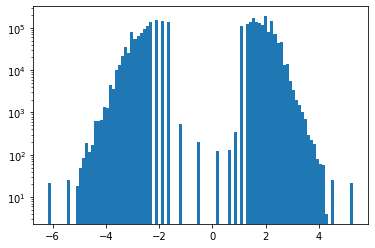

In [47]:
# length = log1p(trip length in days) * sign (trip length) - mean
_ = plt.hist(raw['trip_length'].to_pandas(), bins=100, log=True)
raw['trip_length'].mean(), raw['length'].std()

(0.9421659416330274, 0.33666469444870617)

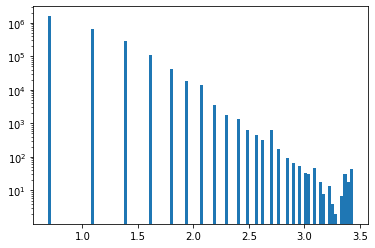

In [48]:
# length = log1p(stay length in days in that city)
_ = plt.hist(raw['length'].to_pandas(), bins=100, log=True)
raw['length'].mean(), raw['length'].std()

In [49]:
raw['log_icount'] = cupy.log1p(raw['icount'])
raw['log_dcount'] = cupy.log1p(raw['dcount'])

(1.063050796463379, 0.6584902605051617)

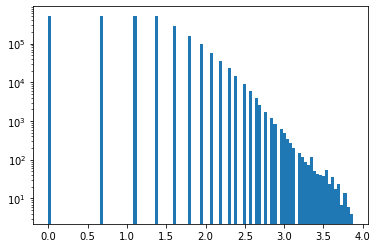

In [50]:
_ = plt.hist(raw['log_icount'].to_pandas(), bins=100, log=True)
raw['log_icount'].mean(), raw['log_icount'].std()

(1.063050796463379, 0.658490260505162)

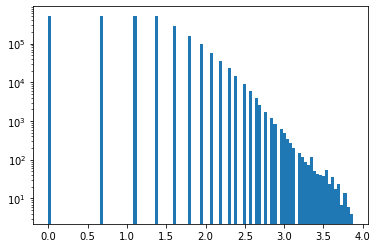

In [51]:
_ = plt.hist(raw['log_dcount'].to_pandas(), bins=100, log=True)
raw['log_dcount'].mean(), raw['log_dcount'].std()

In [52]:
raw['mn'].unique()

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: mn, dtype: int16

In [53]:
raw['dy1'].unique()

0    0
1    1
2    2
3    3
4    4
5    5
6    6
Name: dy1, dtype: int16

In [54]:
raw['dy2'].unique()

0    0
1    1
2    2
3    3
4    4
5    5
6    6
Name: dy2, dtype: int16

In [55]:
class BookingDataset(Dataset):
    def __init__(self,
                 data,
                 target=None,
                ):
        super(BookingDataset, self).__init__()
        self.lag_cities_ = data[lag_cities].values # last 1-5 city id
        self.mn = data['mn'].values - 1 # checkin month 0-11, minue one so start with 0
        self.dy1 = data['dy1'].values # checkin weekday 0-6
        self.dy2 = data['dy2'].values # checkin weekday 0-6
        self.length = data['length'].values # log1p(stay length in days in that city)
        self.trip_length = data['trip_length'].values # stay length of the trips
        self.N = data['N'].values # number of cities
        self.log_icount = data['log_icount'].values # number of cities left, last city icount = 0
        self.log_dcount = data['log_dcount'].values # number of cities passed, first city dcount = 0
        self.lag_countries_ = data[lag_countries].values # last 1-5 hotel country id
        self.first_city = data['first_city'].values # first city id in the trip
        self.first_country = data['first_country'].values # first country id in the trip
        self.booker_country_ = data['booker_country_'].values # booker country
        self.device_class_ = data['device_class_'].values # device class
        self.lapse = data['lapse'].values # log days between checkin and last checkout
        self.season = data['season'].values # checkin quarter 0-3
        self.weekend = data['weekend'].values # 0/1 checkin weekend or not
        if target is None:
            self.target = None
        else:
            self.target = data[target].values
        
    def __len__(self):
        return len(self.lag_cities_)
        
    def __getitem__(self, idx: int):
        input_dict = {
            'lag_cities_': torch.tensor(self.lag_cities_[idx], dtype=torch.long),
            'mn': torch.tensor([self.mn[idx]], dtype=torch.long),
            'dy1': torch.tensor([self.dy1[idx]], dtype=torch.long),
            'dy2': torch.tensor([self.dy2[idx]], dtype=torch.long),
            'length': torch.tensor([self.length[idx]], dtype=torch.float),
            'trip_length': torch.tensor([self.trip_length[idx]], dtype=torch.float),
            'N': torch.tensor([self.N[idx]], dtype=torch.float),
            'log_icount': torch.tensor([self.log_icount[idx]], dtype=torch.float),
            'log_dcount': torch.tensor([self.log_dcount[idx]], dtype=torch.float),
            'lag_countries_': torch.tensor(self.lag_countries_[idx], dtype=torch.long),
            'first_city': torch.tensor([self.first_city[idx]], dtype=torch.long),
            'first_country': torch.tensor([self.first_country[idx]], dtype=torch.long),
            'booker_country_': torch.tensor([self.booker_country_[idx]], dtype=torch.long),
            'device_class_': torch.tensor([self.device_class_[idx]], dtype=torch.long),
            'lapse': torch.tensor([self.lapse[idx]], dtype=torch.float),
            'season': torch.tensor([self.season[idx]], dtype=torch.long),
            'weekend': torch.tensor([self.weekend[idx]], dtype=torch.long),
        }
        if self.target is not None:
            input_dict['target'] = torch.tensor([self.target[idx]], dtype=torch.long)
        return input_dict

In [70]:
raw[['utrip_id','dcount','city_id','city_id_','city_id_lag1','city_id_lag2','lapse']].head(20)

,utrip_id,dcount,city_id,city_id_,city_id_lag1,city_id_lag2,lapse
736,1000027_1,0,8183.0,1318,11159,11159,-1
740,1000027_1,1,15626.0,2545,1318,11159,0
744,1000027_1,2,60902.0,10070,2545,1318,0
748,1000027_1,3,30628.0,5036,10070,2545,0
752,1000033_1,0,38677.0,6383,11159,11159,-1
756,1000033_1,1,52089.0,8616,6383,11159,0
760,1000033_1,2,21328.0,3520,8616,6383,0
764,1000033_1,3,27485.0,4519,3520,8616,0
738,1000033_1,4,38677.0,6383,4519,3520,0
742,1000045_1,0,64876.0,10730,11159,11159,-1


In [64]:
dataset = BookingDataset(raw.to_pandas(), 'city_id_')

# check what is nan in lag data?
dataset.__getitem__(0)

{'N': tensor([-0.7041]),
 'booker_country_': tensor([1]),
 'device_class_': tensor([0]),
 'dy1': tensor([5]),
 'dy2': tensor([6]),
 'first_city': tensor([1318]),
 'first_country': tensor([60]),
 'lag_cities_': tensor([11159, 11159, 11159, 11159, 11159]),
 'lag_countries_': tensor([195, 195, 195, 195, 195]),
 'lapse': tensor([-1.]),
 'length': tensor([0.6931]),
 'log_dcount': tensor([0.]),
 'log_icount': tensor([1.3863]),
 'mn': tensor([7]),
 'season': tensor([2]),
 'target': tensor([1318]),
 'trip_length': tensor([1.6905]),
 'weekend': tensor([1])}

In [57]:
def train_epoch(loader, model, optimizer, scheduler, scaler, device):

    model.train()
    model.zero_grad()
    train_loss = []
    bar = tqdm(range(len(loader)))
    load_iter = iter(loader)
    batch = load_iter.next()
    batch = {k:batch[k].to(device, non_blocking=True) for k in batch.keys() }
    
    for i in bar:
        
        old_batch = batch
        if i + 1 < len(loader):
            batch = load_iter.next()
            batch = {k:batch[k].to(device, non_blocking=True) for k in batch.keys() }
                    

        out_dict = model(old_batch)
        logits = out_dict['logits']
        loss = out_dict['loss']              
        loss_np = loss.detach().cpu().numpy()
        
        loss.backward()

        optimizer.step()
        scheduler.step()
        for p in model.parameters(): 
            p.grad = None

        train_loss.append(loss_np)
        smooth_loss = sum(train_loss[-100:]) / min(len(train_loss), 100)
        bar.set_description('loss: %.5f, smth: %.5f' % (loss_np, smooth_loss))
    return train_loss


def val_epoch(loader, model, device):

    model.eval()
    val_loss = []
    LOGITS = []
    TARGETS = []
       
    with torch.no_grad():
        bar = tqdm(range(len(loader)))
        load_iter = iter(loader)
        batch = load_iter.next()
        batch = {k:batch[k].to(device, non_blocking=True) for k in batch.keys() }


        for i in bar:

            old_batch = batch
            if i + 1 < len(loader):
                batch = load_iter.next()
                batch = {k:batch[k].to(device, non_blocking=True) for k in batch.keys() }

            out_dict = model(old_batch)
            logits = out_dict['logits']
            loss = out_dict['loss']              
            loss_np = loss.detach().cpu().numpy()
            target = old_batch['target']
            LOGITS.append(logits.detach())
            TARGETS.append(target.detach())
            val_loss.append(loss_np) 

            smooth_loss = sum(val_loss[-100:]) / min(len(val_loss), 100)
            bar.set_description('loss: %.5f, smth: %.5f' % (loss_np, smooth_loss))

        val_loss = np.mean(val_loss)

    LOGITS = torch.cat(LOGITS).cpu().numpy()
    TARGETS = torch.cat(TARGETS).cpu().numpy()
    
    return val_loss, LOGITS, TARGETS
        

In [58]:
from pathlib import Path
def save_checkpoint(model, optimizer, scheduler, scaler, best_score, fold, seed, fname):
    checkpoint = {
            'model': model.state_dict(),
            'optimizer': optimizer.state_dict(),
            'scheduler': scheduler.state_dict(),
            'scaler': scaler.state_dict(),
            'epoch': epoch,
            'best_score': best_score,
        }
    _p = './checkpoints/%s' % (fname)
    Path(_p).mkdir(parents=True, exist_ok=True)
    torch.save(checkpoint, './checkpoints/%s/%s_%d_%d.pt' % (fname, fname, fold, seed))

In [59]:
def load_checkpoint(fold, seed, device, fname):
    model = Net(NUM_CITIES+1, NUM_HOTELS+1, EMBEDDING_DIM, HIDDEN_DIM, dropout_rate=DROPOUT_RATE,
                loss=False).to(device)
 
    checkpoint = torch.load('./checkpoints/%s/%s_%d_%d.pt' % (fname, fname, fold, seed))
    model.load_state_dict(checkpoint['model'])
    model.eval()
    return model

In [60]:
loss_fct = torch.nn.CrossEntropyLoss(ignore_index=LOW_CITY)

class Net(nn.Module):

    def __init__(self, num_cities, num_countries, embedding_dim, hidden_dim, dropout_rate, loss=True):
        super(Net, self).__init__()
        self.loss = loss
        self.dropout_rate = dropout_rate
        
        self.cities_embeddings = nn.Embedding(num_cities, embedding_dim)     
        self.cities_embeddings.weight.data.normal_(0., 0.01)
        print('city embedding data shape', self.cities_embeddings.weight.shape)

        self.countries_embeddings = nn.Embedding(num_countries, embedding_dim)     
        self.countries_embeddings.weight.data.normal_(0., 0.01)
        print('country embedding data shape', self.countries_embeddings.weight.shape)

        self.mn_embeddings = nn.Embedding(12, embedding_dim)     
        self.mn_embeddings.weight.data.normal_(0., 0.01)

        self.dy1_embeddings = nn.Embedding(7, embedding_dim)     
        self.dy1_embeddings.weight.data.normal_(0., 0.01)

        self.dy2_embeddings = nn.Embedding(7, embedding_dim)     
        self.dy2_embeddings.weight.data.normal_(0., 0.01)
        
        #self.season_embeddings = nn.Embedding(7, embedding_dim)     
        #self.season_embeddings.weight.data.normal_(0., 0.01)
        
        self.weekend_embeddings = nn.Embedding(2, embedding_dim)     
        self.weekend_embeddings.weight.data.normal_(0., 0.01)
        
        self.linear_length = nn.Linear(1, embedding_dim, bias=False)
        self.norm_length = nn.BatchNorm1d(embedding_dim)
        self.activate_length = nn.ReLU()
        
        self.linear_trip_length = nn.Linear(1, embedding_dim, bias=False)
        self.norm_trip_length = nn.BatchNorm1d(embedding_dim)
        self.activate_trip_length = nn.ReLU()

        self.linear_N = nn.Linear(1, embedding_dim, bias=False)
        self.norm_N = nn.BatchNorm1d(embedding_dim)
        self.activate_N = nn.ReLU()

        self.linear_log_icount = nn.Linear(1, embedding_dim, bias=False)
        self.norm_log_icount = nn.BatchNorm1d(embedding_dim)
        self.activate_log_icount = nn.ReLU()

        self.linear_log_dcount = nn.Linear(1, embedding_dim, bias=False)
        self.norm_log_dcount = nn.BatchNorm1d(embedding_dim)
        self.activate_log_dcount = nn.ReLU()

        self.devices_embeddings = nn.Embedding(NUM_DEVICE, embedding_dim)     
        self.devices_embeddings.weight.data.normal_(0., 0.01)
        print('device_embeddings data shape', self.devices_embeddings.weight.shape)

        self.linear_lapse = nn.Linear(1, embedding_dim, bias=False)
        self.norm_lapse = nn.BatchNorm1d(embedding_dim)
        self.activate_lapse = nn.ReLU()
        
        self.linear1 = nn.Linear((len(lag_cities) + len(lag_countries) + 1)*embedding_dim, hidden_dim)
        self.norm1 = nn.BatchNorm1d(hidden_dim)
        self.activate1 = nn.PReLU()
        self.dropout1 = nn.Dropout(self.dropout_rate)

        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.norm2 = nn.BatchNorm1d(hidden_dim)
        self.activate2 = nn.PReLU()
        self.dropout2 = nn.Dropout(self.dropout_rate)
        
        self.linear3 = nn.Linear(hidden_dim, embedding_dim)
        self.norm3 = nn.BatchNorm1d(embedding_dim)
        self.activate3 = nn.PReLU()
        self.dropout3 = nn.Dropout(self.dropout_rate)
        
        self.output_layer_bias = nn.Parameter(torch.Tensor(num_cities, ))
        self.output_layer_bias.data.normal_(0., 0.01)
        
    def get_embed(self, x, embed):
        """
        lookup embeddings based on index
        """
        bs = x.shape[0]
        x = embed(x)      
        # lag_embed.shape: bs, x.shape[1], embedding_dim
        x = x.view(bs, -1)
        return x

    def forward(self, input_dict):
        lag_embed = self.get_embed(input_dict['lag_cities_'], self.cities_embeddings)      
        lag_countries_embed = self.get_embed(input_dict['lag_countries_'], self.countries_embeddings)      
        mn_embed = self.get_embed(input_dict['mn'], self.mn_embeddings)      
        dy1_embed = self.get_embed(input_dict['dy1'], self.dy1_embeddings)      
        dy2_embed = self.get_embed(input_dict['dy2'], self.dy2_embeddings)  
        #season_embed = self.get_embed(input_dict['season'], self.season_embeddings)  
        weekend_embed = self.get_embed(input_dict['weekend'], self.weekend_embeddings)  
        length = input_dict['length']
        length_embed = self.activate_length(self.norm_length(self.linear_length(length)))
        trip_length = input_dict['trip_length']
        trip_length_embed = self.activate_trip_length(self.norm_trip_length(self.linear_trip_length(trip_length)))
        N = input_dict['N']
        N_embed = self.activate_N(self.norm_N(self.linear_N(N)))
        lapse = input_dict['lapse']
        lapse_embed = self.activate_lapse(self.norm_lapse(self.linear_lapse(lapse)))
        log_icount = input_dict['log_icount']
        log_icount_embed = self.activate_log_icount(self.norm_log_icount(self.linear_log_icount(log_icount)))
        log_dcount = input_dict['length']
        log_dcount_embed = self.activate_log_dcount(self.norm_log_dcount(self.linear_log_dcount(log_dcount)))
        first_city_embed = self.get_embed(input_dict['first_city'], self.cities_embeddings)  
        first_country_embed = self.get_embed(input_dict['first_country'], self.countries_embeddings)  
        booker_country_embed = self.get_embed(input_dict['booker_country_'], self.countries_embeddings)  
        device_embed = self.get_embed(input_dict['device_class_'], self.devices_embeddings)  
        x = (mn_embed + dy1_embed + dy2_embed + length_embed + log_icount_embed + log_dcount_embed \
             + first_city_embed + first_country_embed + booker_country_embed + device_embed \
             + trip_length_embed + N_embed + lapse_embed + weekend_embed)
        x = torch.cat([lag_embed, lag_countries_embed, x], -1)
        x = self.activate1(self.norm1(self.linear1(x)))
        x = self.dropout1(x)
        x = x + self.activate2(self.norm2(self.linear2(x)))
        x = self.dropout2(x)
        x = self.activate3(self.norm3(self.linear3(x)))
        x = self.dropout3(x)
        logits = F.linear(x, self.cities_embeddings.weight, bias=self.output_layer_bias)
        output_dict = {
            'logits':logits
                      }
        if self.loss:
            target = input_dict['target'].squeeze(1)
            #print(logits.shape, target.shape)
            loss = loss_fct(logits, target)
            output_dict['loss'] = loss
        return output_dict


In [84]:
TRAIN_BATCH_SIZE = 256
WORKERS = 2 #8
LR = 1e-3
EPOCHS = 12
GRADIENT_ACCUMULATION = 1
EMBEDDING_DIM = 64
HIDDEN_DIM =  1024
DROPOUT_RATE = 0.2
device = torch.device('cuda')

In [82]:
def get_top4(preds):
    TOP4 = np.empty((preds.shape[0], 4))
    for i in range(4):
        x = np.argmax(preds, axis=1)
        TOP4[:,i] = x
        x = np.expand_dims(x, axis=1)
        np.put_along_axis(preds, x, -1e10, axis=1)
    return TOP4

def top4(preds, target):
    TOP4 = get_top4(preds)
    acc = np.max(TOP4 == target, axis=1)
    acc = np.mean(acc)
    return acc

In [ ]:
TRAIN_WITH_TEST = True

seed = 0
seed_torch(seed)

preds_all = []
best_scores = []
best_epochs = []
for fold in range(5):

    seed_torch(seed)
    preds_fold = []
    print('#'*25)
    print('### FOLD %i'%(fold))
    if TRAIN_WITH_TEST:
        # 1. training set and exclude first record of each trip
        # 2. testing set and exclude last record of each trip (which is for submission)
        # ??? why not exclude first record of each trip in test set?
        train = raw.loc[ (raw.fold!=fold)&(raw.dcount>0)&(raw.istest==0)|( (raw.istest==1)&(raw.icount>0) ) ].copy()
    else:
        train = raw.loc[ (raw.fold!=fold)&(raw.dcount>0)&(raw.istest==0) ].copy()
    # validation set: 
    # take only last record of each trip in train and exclude reversed trip
    valid = raw.loc[ (raw.fold==fold)&(raw.istest==0)&(raw.icount==0) &(raw.reverse == 0)].copy()
    print(train.shape, valid.shape)

    train_dataset = BookingDataset(train.to_pandas(), target='city_id_')

    train_data_loader = DataLoader(
        train_dataset,
        batch_size=TRAIN_BATCH_SIZE,
        num_workers=WORKERS,
        shuffle=True,
        pin_memory=True,
    )

    valid_dataset = BookingDataset(valid.to_pandas(), target='city_id_')

    valid_data_loader = DataLoader(
        valid_dataset,
        batch_size=TRAIN_BATCH_SIZE,
        num_workers=WORKERS,
        shuffle=False,
        pin_memory=True,
    )
    

    model = Net(NUM_CITIES+1, NUM_HOTELS+1, EMBEDDING_DIM, HIDDEN_DIM, dropout_rate=DROPOUT_RATE).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer=optimizer, 
                                              pct_start=0.1, 
                                              div_factor=1e3, 
                                              max_lr=3e-3, 
                                              epochs=EPOCHS, 
                                              steps_per_epoch=int(np.ceil(len(train_data_loader)/GRADIENT_ACCUMULATION)))
    scaler = GradScaler()

    best_score = 0
    best_epoch = 0

    for epoch in range(EPOCHS):
        print(time.ctime(), 'Epoch:', epoch, flush=True)
        train_loss = train_epoch(train_data_loader, model, optimizer, scheduler, scaler, device)
        val_loss, PREDS, TARGETS = val_epoch(valid_data_loader, model, device) 
        PREDS[:, LOW_CITY] = -1e10# remove low frequency cities
        score = top4(PREDS, TARGETS)

        content = 'Fold %d Seed %d Ep %d lr %.7f train loss %4f val loss %4f score %4f'
        print(content % (fold, seed, epoch, 
                         optimizer.param_groups[0]["lr"],
                         np.mean(train_loss),
                         np.mean(val_loss),
                         score,
                        ), 
              flush=True)
        if score > best_score:
            best_score = score
            best_epoch = epoch
            preds_fold = PREDS
            save_checkpoint(model, optimizer, scaler, scheduler, best_score, fold, seed, fname)
    del model, scaler, scheduler, optimizer, valid_data_loader, valid_dataset, train_data_loader, train_dataset
    gc.collect()

    preds_all.append(preds_fold)
    print('fold %d, best score: %0.6f best epoch: %3d' % (fold, best_score, best_epoch))
    best_scores.append(best_score)
    best_epochs.append(best_epoch)
    #with open('../checkpoints/%s/%s_%d_preds.pkl' % (fname, fname, seed), 'wb') as file:
    #    pkl.dump(preds_all, file)
        
    #break
print()
for fold, (best_score, best_epoch) in enumerate(zip(best_scores, best_epochs)):
    print('fold %d, best score: %0.6f best epoch: %3d' % (fold, best_score, best_epoch))
print('seed %d best score: %0.6f best epoch: %0.1f' % (seed, np.mean(best_scores), np.mean(best_epochs)))

#########################
### FOLD 0
(1826251, 51) (43552, 51)
city embedding data shape torch.Size([11160, 64])
country embedding data shape torch.Size([196, 64])
device_embeddings data shape torch.Size([3, 64])
Tue Apr 13 04:51:16 2021 Epoch: 0


loss: 3.59993, smth: 3.48875: 100%|██████████| 171/171 [00:06<00:00, 27.78it/s]


Fold 0 Seed 0 Ep 0 lr 0.0027995 train loss 5.393601 val loss 3.487047 score 0.498967
Tue Apr 13 04:56:39 2021 Epoch: 1


loss: 3.23972, smth: 3.24558: 100%|██████████| 171/171 [00:06<00:00, 25.98it/s]


Fold 0 Seed 0 Ep 1 lr 0.0029596 train loss 3.598038 val loss 3.242215 score 0.530814
Tue Apr 13 05:02:01 2021 Epoch: 2


loss: 3.21740, smth: 3.17244: 100%|██████████| 171/171 [00:06<00:00, 25.59it/s]


Fold 0 Seed 0 Ep 2 lr 0.0027990 train loss 3.400469 val loss 3.166773 score 0.542570
Tue Apr 13 05:07:27 2021 Epoch: 3


loss: 2.83629, smth: 3.10045: 100%|██████████| 171/171 [00:06<00:00, 26.58it/s]


Fold 0 Seed 0 Ep 3 lr 0.0025293 train loss 3.296260 val loss 3.099607 score 0.547736
Tue Apr 13 05:12:49 2021 Epoch: 4


loss: 3.21642, smth: 3.08190: 100%|██████████| 171/171 [00:06<00:00, 25.70it/s]


Fold 0 Seed 0 Ep 4 lr 0.0021731 train loss 3.223840 val loss 3.079911 score 0.551869
Tue Apr 13 05:18:17 2021 Epoch: 5


loss: 3.30154, smth: 3.19137:  63%|██████▎   | 4463/7134 [03:18<01:57, 22.64it/s]

In [156]:
def test_epoch(loader, models, device):

    #model.eval()
    PREDS = []
    
    with torch.no_grad():
        if 1:
            bar = tqdm(range(len(loader)))
            load_iter = iter(loader)
            batch = load_iter.next()
            batch = {k:batch[k].to(device, non_blocking=True) for k in batch.keys() }

            for i in bar:
                old_batch = batch
                if i + 1 < len(loader):
                    batch = load_iter.next()
                    batch = {k:batch[k].to(device, non_blocking=True) for k in batch.keys() }
                    
                preds = 0
                for model in models:
                    out_dict = model(old_batch)
                    preds = preds + out_dict['logits'] / NFOLDS
                PREDS.append(preds.detach())
                
    
    PREDS = torch.cat(PREDS).cpu().numpy()
    
    return PREDS

NFOLDS = 5
seed = 0
models = [load_checkpoint(fold, seed, device, fname) for fold in range(NFOLDS)]

city embedding data shape torch.Size([11160, 64])
country embedding data shape torch.Size([196, 64])
device_embeddings data shape torch.Size([3, 64])
city embedding data shape torch.Size([11160, 64])
country embedding data shape torch.Size([196, 64])
device_embeddings data shape torch.Size([3, 64])
city embedding data shape torch.Size([11160, 64])
country embedding data shape torch.Size([196, 64])
device_embeddings data shape torch.Size([3, 64])


FileNotFoundError: ignored

In [ ]:
pd.options.display.max_columns = 100

## Test N-1 (leaky as we train using all test)

In [ ]:
def acc(valid):
    acc = cupy.max(valid[COLS[1:]].values == valid[['city_id']].values, axis=1)
    acc = cupy.mean(acc)
    return acc

In [ ]:
test = raw.loc[ (raw.istest==1)&(raw.icount==1) ].copy()
print( test.shape )
test.head()

In [ ]:
test_dataset = BookingDataset(test.to_pandas(), target=None)

test_data_loader = DataLoader(
    test_dataset,
    batch_size=TRAIN_BATCH_SIZE,
    num_workers=WORKERS,
    shuffle=False,
    pin_memory=True,
)

PREDS = test_epoch(test_data_loader, models, device) 
PREDS[:, LOW_CITY] = -1e10# remove low frequency cities
TOP4 = get_top4(PREDS).astype('int')
TOP4.shape

COLS = ['utrip_id']

In [ ]:
city_mapping = MAPS[0].reset_index()

In [ ]:
CITY_MAP = MAPS[0].astype('int')
for k in range(4):
    test['city_id_%i'%(k+1)] = TOP4[:,k]
    tmp = test[['city_id_%i'%(k+1)]].astype('int32').copy()
    tmp['sorting'] = cupy.asarray(range(tmp.shape[0]))
    tmp = tmp.merge(city_mapping, how='left', left_on='city_id_%i'%(k+1), right_on='index')
    tmp = tmp.sort_values('sorting')
    test['city_id_%i'%(k+1)] = tmp['city_id'].astype('int32').values.copy()
    COLS.append('city_id_%i'%(k+1))
    
test[COLS].head()

In [ ]:
test.head()

In [ ]:
acc(test)

## Test submission

In [ ]:
test = raw.loc[ (raw.istest==1)&(raw.icount==0)&(raw.reverse==0) ].copy()
print( test.shape )
test.head()

In [ ]:
test_dataset = BookingDataset(test.to_pandas(), target=None)

test_data_loader = DataLoader(
    test_dataset,
    batch_size=TRAIN_BATCH_SIZE,
    num_workers=WORKERS,
    shuffle=False,
    pin_memory=True,
)

PREDS = test_epoch(test_data_loader, models, device) 
PREDS[:, LOW_CITY] = -1e10# remove low frequency cities
TOP4 = get_top4(PREDS).astype('int')
TOP4.shape

COLS = ['utrip_id']
CITY_MAP = MAPS[0].astype('int')
for k in range(4):
    test['city_id_%i'%(k+1)] = TOP4[:,k]
    tmp = test[['city_id_%i'%(k+1)]].astype('int32').copy()
    tmp['sorting'] = cupy.asarray(range(tmp.shape[0]))
    tmp = tmp.merge(city_mapping, how='left', left_on='city_id_%i'%(k+1), right_on='index')
    tmp = tmp.sort_values('sorting')
    test['city_id_%i'%(k+1)] = tmp['city_id'].astype('int32').values.copy()
    COLS.append('city_id_%i'%(k+1))
    
test[COLS].head()

In [ ]:
test[COLS].to_csv('%s_sub.csv' % fname, index=False)

## OOF Prediction

In [ ]:
def load_checkpoint(fold, seed, device, fname, loss=False):
    model = Net(NUM_CITIES+1, NUM_HOTELS+1, EMBEDDING_DIM, HIDDEN_DIM, dropout_rate=DROPOUT_RATE,
                loss=loss).to(device)
 
    checkpoint = torch.load('./checkpoints/%s/%s_%d_%d.pt' % (fname, fname, fold, seed))
    model.load_state_dict(checkpoint['model'])
    model.eval()
    return model

def get_topN(preds, N):
    TOPN = np.empty((preds.shape[0], N))
    PREDN = np.empty((preds.shape[0], N))
    preds = preds.copy()
    for i in tqdm(range(N)):
        x = np.argmax(preds, axis=1)
        TOPN[:,i] = x
        x = np.expand_dims(x, axis=1)
        PREDN[:,i] = np.take_along_axis(preds, x, axis=1).ravel()
        np.put_along_axis(preds, x, -1e10, axis=1)
    return TOPN, PREDN

def get_top4(preds):
    preds = preds.copy()
    TOP4 = np.empty((preds.shape[0], 4))
    for i in range(4):
        x = np.argmax(preds, axis=1)
        TOP4[:,i] = x
        x = np.expand_dims(x, axis=1)
        np.put_along_axis(preds, x, -1e10, axis=1)
    return TOP4

def top4(preds, target):
    TOP4 = get_top4(preds)
    acc = np.max(TOP4 == target, axis=1)
    acc = np.mean(acc)
    return acc

TRAIN_WITH_TEST = True

seed = 0
seed_torch(seed)

preds_all = []
test_preds_all = []
train_all = []
best_scores = []
for fold in range(1):

    seed_torch(seed)
    preds_fold = []
    print('#'*25)
    print('### FOLD %i'%(fold))
    valid = raw.loc[ (raw.fold==fold)&(raw.istest==0)&(raw.icount==0) &(raw.reverse == 0)].copy()
    print(valid.shape)

    valid_dataset = BookingDataset(valid.to_pandas(), target='city_id_')

    valid_data_loader = DataLoader(
        valid_dataset,
        batch_size=TRAIN_BATCH_SIZE,
        num_workers=WORKERS,
        shuffle=False,
        pin_memory=True,
    )
    
    test_dataset = BookingDataset(test.to_pandas(), target=None)

    test_data_loader = DataLoader(
        test_dataset,
        batch_size=TRAIN_BATCH_SIZE,
        num_workers=WORKERS,
        shuffle=False,
        pin_memory=True,
    )

    
    model = load_checkpoint(fold, seed, device, fname, loss=True)
    val_loss, PREDS, TARGETS = val_epoch(valid_data_loader, model, device) 
    PREDS[:, LOW_CITY] = -1e10# remove low frequency cities
    score = top4(PREDS, TARGETS)
    print('fold %d, best score: %0.6f' % (fold, score))
    score = top4(PREDS, valid[['city_id_']].to_pandas().values)
    print('fold %d, best score: %0.6f' % (fold, score))
    best_scores.append(score)
    preds_all.append(PREDS)
    train_all.append(valid.to_pandas())

    model = load_checkpoint(fold, seed, device, fname, loss=False)
    TEST_PREDS = test_epoch(test_data_loader, [model], device) 
    TEST_PREDS[:, LOW_CITY] = -1e10# remove low frequency cities
    test_preds_all.append(TEST_PREDS)
print('seed %d best score: %0.6f' % (seed, np.mean(best_scores)))

preds_all = np.concatenate(preds_all)
print('vaid pred shape', preds_all.shape)

test_preds_all = np.mean(test_preds_all, axis=0)
print('test pred shape', test_preds_all.shape)

top_preds, top_logits = get_topN(preds_all, 4)
targets = np.concatenate([valid[['city_id_']].values for valid in train_all])
valid_trips = np.concatenate([valid[['utrip_id']].values for valid in train_all])

print('CV score', np.mean(np.max(top_preds == targets, axis=1)))

valid_trips

top_preds, top_logits = get_topN(preds_all, 50)
top_test_preds, top_test_logits = get_topN(test_preds_all, 50)


top_preds.shape, top_logits.shape, top_test_preds.shape, top_test_logits.shape

valid_cities = np.concatenate([valid[['city_id']].values for valid in train_all])
oof = {
    'valid_trips':valid_trips,
    'top_preds':top_preds,
    'top_logits':top_logits,
    'top_test_preds':top_test_preds,
    'top_test_logits':top_test_logits,
    'city_map':CITY_MAP,
    'valid_cities':valid_cities,
}

with open((checkpoint_path / (fname + '_oof.pkl')), 'wb') as file:
    pkl.dump(oof, file)
    
print('done')


In [ ]:
oof = {
    'valid_trips':valid_trips,
    'top_preds':top_preds,
    'top_logits':top_logits,
    'top_test_preds':top_test_preds,
    'top_test_logits':top_test_logits,
    'city_map':CITY_MAP,
    'valid_cities':valid_cities,
    'preds_all':preds_all,
    'test_preds_all':test_preds_all,
}

with open((checkpoint_path / (fname + '_oof.pkl')), 'wb') as file:
    pkl.dump(oof, file, protocol=pkl.HIGHEST_PROTOCOL)
    
print('done')